<a href="https://colab.research.google.com/github/Pushpalatha-H/TechnoHacks_internship/blob/main/TechnoHacks_House_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Sales in King County, USA


**Use a dataset that includes information about
housing prices and features like square
footage, number of bedrooms, etc. to train a
model that can predict the price of a new
house**

In [337]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [338]:
df = pd.read_csv("/content/Technohacks_internship_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Check N/A Values**

In [339]:
df.isna().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [342]:
df1 = df[['bedrooms', 'bathrooms', 'sqft_living','zipcode' ,'price', ]]
df1

,bedrooms,bathrooms,sqft_living,zipcode,price
0,3,1.00,1180,98178,221900.0
1,3,2.25,2570,98125,538000.0
2,2,1.00,770,98028,180000.0
3,4,3.00,1960,98136,604000.0
4,3,2.00,1680,98074,510000.0
...,...,...,...,...,...
21608,3,2.50,1530,98103,360000.0
21609,4,2.50,2310,98146,400000.0
21610,2,0.75,1020,98144,402101.0
21611,3,2.50,1600,98027,400000.0


**Add price_per_sqft column**

In [343]:
price_per_sqft = df1['price'] / df1['sqft_living']
price_per_sqft

,0
0,188.050847
1,209.338521
2,233.766234
3,308.163265
4,303.571429
...,...
21608,235.294118
21609,173.160173
21610,394.216667
21611,250.000000


In [344]:
df1['price_per_sqft'] = price_per_sqft

<ipython-input-344-2db6e1e40c27>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_per_sqft'] = price_per_sqft


In [345]:
df1.head()

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
0,3,1.00,1180,98178,221900.0,188.050847
1,3,2.25,2570,98125,538000.0,209.338521
2,2,1.00,770,98028,180000.0,233.766234
3,4,3.00,1960,98136,604000.0,308.163265
4,3,2.00,1680,98074,510000.0,303.571429


In [382]:
df1.describe()

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
count,21546.000000,21546.000000,21546.000000,21546.000000,2.154600e+04,21546.000000
mean,3.371577,2.114696,2081.069897,98077.947925,5.405474e+05,264.174488
std,0.930321,0.770165,918.876889,53.534403,3.677912e+05,110.136835
min,0.000000,0.000000,290.000000,98001.000000,7.500000e+04,87.588235
25%,3.000000,1.750000,1430.000000,98033.000000,3.220000e+05,182.206234
50%,3.000000,2.250000,1911.000000,98065.000000,4.500000e+05,244.626805
75%,4.000000,2.500000,2550.000000,98118.000000,6.450000e+05,318.375621
max,33.000000,8.000000,13540.000000,98199.000000,7.700000e+06,810.138889


In [346]:
df1.isna().sum()

,0
bedrooms,0
bathrooms,0
sqft_living,0
zipcode,0
price,0
price_per_sqft,0


In [347]:
df1.shape

(21613, 6)

In [348]:
df1.duplicated().sum()                      # we have more columns we can drop duplicates

67

In [349]:
df1.drop_duplicates(inplace = True)

<ipython-input-349-b8e706a2be12>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.drop_duplicates(inplace = True)


In [350]:
df1.duplicated().sum()

0

In [351]:
df1.head()

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
0,3,1.00,1180,98178,221900.0,188.050847
1,3,2.25,2570,98125,538000.0,209.338521
2,2,1.00,770,98028,180000.0,233.766234
3,4,3.00,1960,98136,604000.0,308.163265
4,3,2.00,1680,98074,510000.0,303.571429


In [352]:
df1['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [353]:
df1[df1['bedrooms'] > 10]                 # typical sqft per room is 250, but here it has 1620 sqft, which has 33 bedrooms we should remove that outliers

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
8757,11,3.00,3000,98106,520000.0,173.333333
15870,33,1.75,1620,98103,640000.0,395.061728


**typical sqft per room is 250, but here it has 1620 sqft, which has 33 bedrooms we should remove that outliers**

#Outlier Removal Using Business Logic
**we should divide total_sqft by number of bedrooms & we should remove the columns which are less than 250**

In [355]:
df1[df1['sqft_living']/ df1['bedrooms'] < 250].head()

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
319,4,1.00,800,98166,268750.0,335.937500
1168,2,0.75,440,98070,290000.0,659.090909
4203,3,0.75,490,98014,150000.0,306.122449
5438,3,1.00,670,98024,340000.0,507.462687
5885,3,1.00,680,98144,230000.0,338.235294


In [356]:
# to remove the outliers we should (~) negotiate it
df2 = df1[~(df1['sqft_living']/ df1['bedrooms'] < 250)]
df2

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
0,3,1.00,1180,98178,221900.0,188.050847
1,3,2.25,2570,98125,538000.0,209.338521
2,2,1.00,770,98028,180000.0,233.766234
3,4,3.00,1960,98136,604000.0,308.163265
4,3,2.00,1680,98074,510000.0,303.571429
...,...,...,...,...,...,...
21608,3,2.50,1530,98103,360000.0,235.294118
21609,4,2.50,2310,98146,400000.0,173.160173
21610,2,0.75,1020,98144,402101.0,394.216667
21611,3,2.50,1600,98027,400000.0,250.000000


In [357]:
df2.shape

(21525, 6)

In [358]:
df2[df2['sqft_living']/ df2['bedrooms'] < 250]                    # all outliers are removed

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft


In [359]:
df2['sqft_living'].unique()

array([1180, 2570,  770, ..., 3087, 3118, 1425])

In [360]:
df2['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

#Feature Engineering

In [361]:
df2['bathrooms'].unique()

array([1.  , 2.25, 3.  , 2.  , 4.5 , 1.5 , 2.5 , 1.75, 2.75, 3.25, 4.  ,
       3.5 , 0.75, 4.75, 5.  , 4.25, 3.75, 0.  , 1.25, 5.25, 6.  , 0.5 ,
       5.5 , 6.75, 5.75, 8.  , 7.5 , 7.75, 6.25, 6.5 ])

In [362]:
df2['bathrooms'].dtype                 # the numbers in bathrooms are of decimal type should round it.

dtype('float64')

In [363]:
def round_number(number):
  # check for the fractional part is non-zero
  if number % 1 != 0:
    return round(number)
  else:
    return int(number)

numbers = [2.3, 4, 5.6]
round_numbers = [round_number(num) for num in numbers]
print(round_numbers)

[2, 4, 6]


In [364]:
round_number(8.9)

9

In [365]:
round_number(6.2)

6

In [366]:
df3 = df2.copy()
df3['bathrooms'] = df3['bathrooms'].apply(round_number)

In [367]:
df3.head()

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
0,3,1,1180,98178,221900.0,188.050847
1,3,2,2570,98125,538000.0,209.338521
2,2,1,770,98028,180000.0,233.766234
3,4,3,1960,98136,604000.0,308.163265
4,3,2,1680,98074,510000.0,303.571429


In [368]:
df3['bathrooms'].unique()             # outliers removed

array([1, 2, 3, 4, 5, 0, 6, 7, 8])

In [369]:
df3.sqft_living.describe()

,sqft_living
count,21525.000000
mean,2082.145041
std,918.623830
min,290.000000
25%,1430.000000
50%,1920.000000
75%,2550.000000
max,13540.000000


In [370]:
df3.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'price',
       'price_per_sqft'],
      dtype='object')

In [384]:
df3['price_per_sqft'].min()

87.58823529411765

In [385]:
df3['price_per_sqft'].max()

810.1388888888889

**Here we find that min price per sqft is 87 $/sqft whereas max is 810, this shows a wide variation in property prices. We should remove outliers per location using mean and one standard deviation**

define a dataframe remove_ppt_outliers, groupby('location') called subdf. calculate mean, std for subdf

In [371]:
def reduced_ppt_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('zipcode'):
    m = np.mean(subdf['price_per_sqft'])
    std = np.mean(subdf['price_per_sqft'])
    reduced_out = subdf[(subdf.price_per_sqft>(m-std)) & (subdf.price_per_sqft<=(m+std))]
    df_out = pd.concat([df_out, reduced_out])
  return df_out
df4 = reduced_ppt_outliers(df3)
df4.head(2)

,bedrooms,bathrooms,sqft_living,zipcode,price,price_per_sqft
38,4,1,1220,98001,240000.0,196.721311
67,4,2,2240,98001,287000.0,128.125000


Text(0.5, 1.0, 'sqft V/s price')

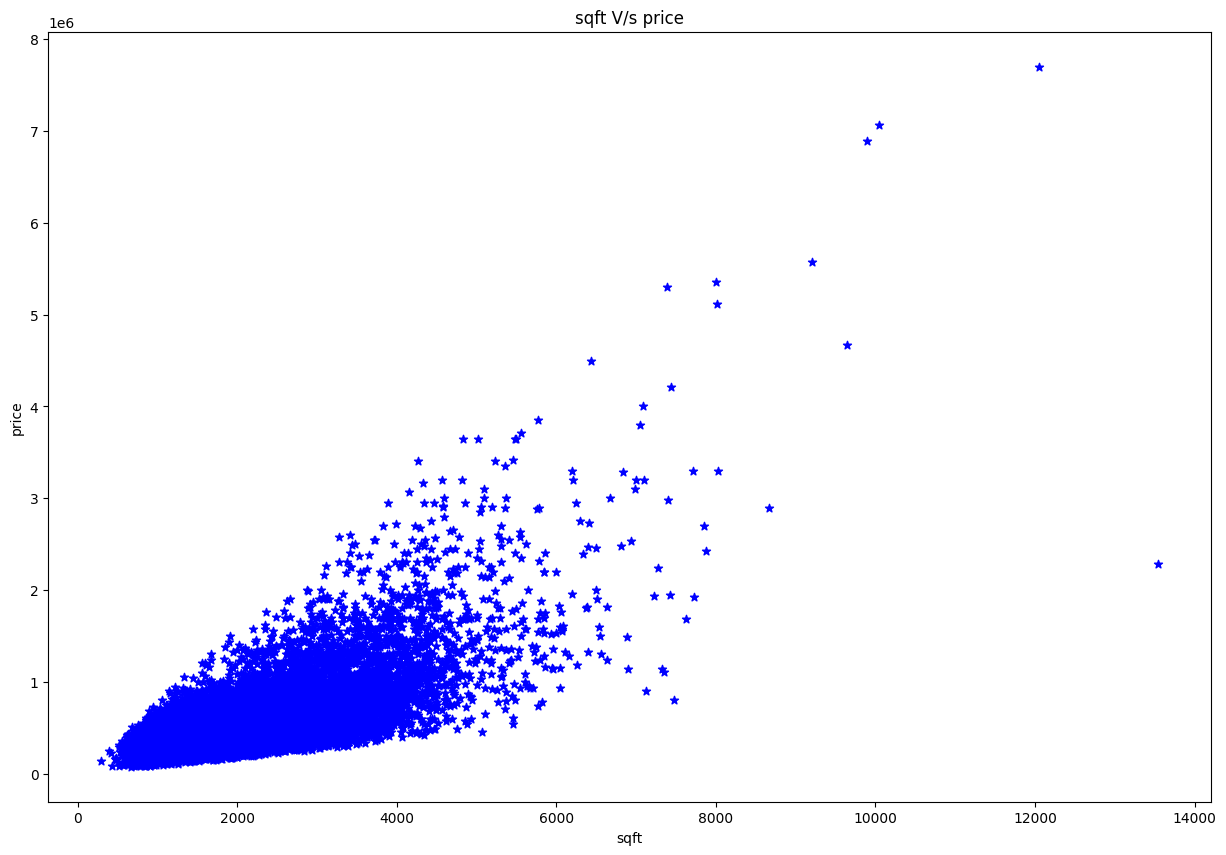

In [372]:
import matplotlib.pyplot as plt
%matplotlib inline


plt.scatter(df4['sqft_living'], df4['price'], color = 'blue', marker = '*')
plt.xlabel('sqft')
plt.ylabel('price')
plt.title("sqft V/s price")

In [373]:
df4.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'zipcode', 'price',
       'price_per_sqft'],
      dtype='object')

#Model Training

In [374]:
x = df4.drop('price', axis = 'columns')
y = df4['price']

In [375]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

In [376]:
len(x_train)

16014

In [377]:
len(x_test)

5338

#Using LinearRegression

In [378]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [379]:
lr.score(x_test, y_test)

0.880076204238182

#Cross_val_score

In [380]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.87555134, 0.88392473, 0.89406205, 0.88411817, 0.90019461])

# Finding best_model and best_params

In [381]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model_using_gridsearchcv(x,y):
    algos = {
        'linear_regression' : {
            'model': LinearRegression(),
            'params': {
                # 'normalize': ['copy_X', 'fit_intercept', 'n_jobs', 'positive'] # 'normalize' is not a valid parameter for LinearRegression
                'fit_intercept': [True, False], # Example of valid parameters
                'n_jobs': [-1, 1] # Example of valid parameters
            }
        },
        'lasso': {
            'model': Lasso(),
            'params': {
                'alpha': [1,2],
                'selection': ['random', 'cyclic']
            }
        },
        'decision_tree': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion' : ['mse','friedman_mse'],
                'splitter': ['best','random']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
10 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_

,model,best_score,best_params
0,linear_regression,0.887570,"{'fit_intercept': True, 'n_jobs': -1}"
1,lasso,0.887570,"{'alpha': 2, 'selection': 'cyclic'}"
2,decision_tree,0.990562,"{'criterion': 'friedman_mse', 'splitter': 'best'}"
